# MNIST Binary MSE Test

In [1]:
import numpy
from binary_helpers import binary

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Adapt the model to binary code
As this is MSE, we don't need an activation function on the output layer, we must also convert y values to binary encoding.

In [3]:
binary_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(4)
])

In [4]:
binary_model.compile(optimizer='adam',
              loss='mse')

In [5]:
y_train_bin = numpy.stack([binary(4)(y_i) for y_i in y_train])
y_test_bin = numpy.stack([binary(4)(y_i) for y_i in y_test])
binary_model.fit(x_train, y_train_bin,  epochs=20,validation_data=(x_test, y_test_bin), verbose=0)

## We display some results
### The validation loss tells us how well the training went

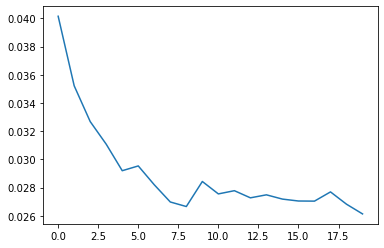

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown

plt.plot(binary_model.history.history['val_loss'])

## Define accuracy: We need to threshold the binary values and convert back to ordinal

In [7]:
def accuracy(model, x, y):

    y_bin=model.predict(x)
    y_bin[y_bin>=.5]=1
    y_bin[y_bin<.5]=0
    
    y_ord=[int("".join(map(str, y_i.astype(numpy.uint8))),2) for y_i in y_bin]
    right=numpy.count_nonzero(y_ord== y)
    return(right/len(y))

### Print the final results in big bold text

In [8]:
text = "The accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    accuracy(binary_model, x_test,y_test)*100,
    accuracy(binary_model, x_train,y_train)*100)
display(Markdown(f"# {text}"))

# The accuracy is 94.740% for the test set and 96.023% for the training set

In [9]:
text

'The accuracy is 94.740% for the test set and 96.023% for the training set'